In [1]:
import tensorflow as tf
import tensorflow_text as tf_text
import json
import matplotlib.pyplot as plt
from quantus_nlp.models import pre_process_model
from quantus_nlp.data import sample_messages
import numpy as np

### Load sample messages

In [2]:
X = sample_messages()
X

[' CHARLOTTE, N.C. (Sports Network) - Carolina Panthers  running back Stephen Davis will miss the remainder of the  season after being placed on injured reserve Saturday.',
 ' PRESENTACION, Philippines (Reuters) - Philippine communist  rebels freed Wednesday two soldiers they had held as "prisoners  of war" for more than five months, saying they wanted to  rebuild confidence in peace talks with the government.',
 'SAN FRANCISCO, CA - November 30, 2004 -Ubisoft, one of the world #39;s largest video game publishers, today announced its plans to launch the next installment in the Tom Clancy #39;s Rainbow SixR franchise for the Sony PlayStationR2 computer entertainment system ',
 'DANIEL VETTORI spun New Zealand to the brink of a crushing victory over Bangladesh in the second and final Test at the MA Aziz Stadium in Chittagong today.',
 "AFP - Georgian and South Ossetian forces overnight accused each other of trying to storm the other side's positions in Georgia's breakaway region of South

### Load training metadata and plot it

In [3]:
history = tf.io.read_file('/Users/artemsereda/Documents/PycharmProjects/quantus-nlp/model/history.json').numpy()

history = json.loads(history)
history

{'loss': [0.5149069428443909,
  0.33142104744911194,
  0.29006800055503845,
  0.25925248861312866,
  0.23549659550189972,
  0.21502913534641266,
  0.19589444994926453,
  0.17989180982112885,
  0.16774559020996094,
  0.1492500752210617,
  0.14738215506076813,
  0.14680935442447662,
  0.14480739831924438,
  0.1430090367794037,
  0.1437748521566391],
 'accuracy': [0.8123020529747009,
  0.88713538646698,
  0.9021562337875366,
  0.910697877407074,
  0.9179583191871643,
  0.9244999885559082,
  0.9318854212760925,
  0.937541663646698,
  0.9423750042915344,
  0.9487916827201843,
  0.949177086353302,
  0.949177086353302,
  0.9495208263397217,
  0.9506562352180481,
  0.9509375095367432],
 'val_loss': [0.3288279175758362,
  0.2904762327671051,
  0.2714524269104004,
  0.259430855512619,
  0.25118356943130493,
  0.2461809664964676,
  0.24488118290901184,
  0.2464795708656311,
  0.24942150712013245,
  0.25298458337783813,
  0.25335898995399475,
  0.2548801898956299,
  0.2547991871833801,
  0.2540554

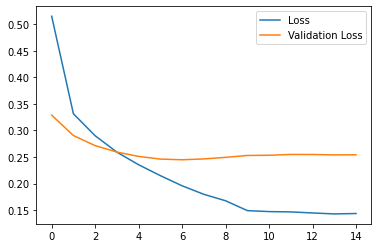

In [4]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])

plt.legend(['Loss', 'Validation Loss'])

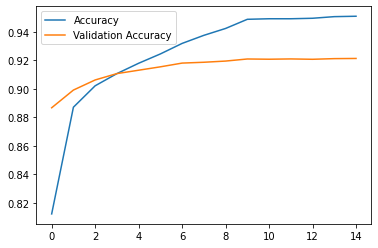

In [5]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])

### Create preprocess (and embedding) model, and demonstrate it's output

In [6]:
preprocess = pre_process_model()

In [7]:
X_preprocessed = preprocess(X)
X_preprocessed

{'input_mask': <tf.Tensor: shape=(10, 128), dtype=int32, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>,
 'input_word_ids': <tf.Tensor: shape=(10, 128), dtype=int32, numpy=
 array([[  101,  5904,  1010, ...,     0,     0,     0],
        [  101,  2556, 21736, ...,     0,     0,     0],
        [  101,  2624,  3799, ...,     0,     0,     0],
        ...,
        [  101,  9706,  1011, ...,     0,     0,     0],
        [  101,  1996,  6867, ...,     0,     0,     0],
        [  101,  1996,  3842, ...,     0,     0,     0]], dtype=int32)>,
 'input_type_ids': <tf.Tensor: shape=(10, 128), dtype=int32, numpy=
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0

### Load transformer model, and give pre-processed data to it

In [ ]:
nn = tf.saved_model.load('/Users/artemsereda/Documents/PycharmProjects/quantus-nlp/model/encoder')

In [8]:
res = nn(X_preprocessed)
res

<tf.Tensor: shape=(10, 4), dtype=float32, numpy=
array([[4.8233705e-04, 9.9931467e-01, 1.4044762e-04, 6.2506166e-05],
       [9.9953425e-01, 6.0218514e-05, 2.6735963e-04, 1.3816346e-04],
       [4.6963603e-04, 3.1472670e-04, 2.1397578e-02, 9.7781801e-01],
       [5.2338457e-03, 9.9466962e-01, 7.2167262e-05, 2.4280835e-05],
       [9.7878224e-01, 7.8281888e-04, 4.4392722e-04, 1.9991040e-02],
       [3.1545683e-04, 4.5619279e-04, 2.3272889e-02, 9.7595549e-01],
       [2.6417413e-04, 9.9964237e-01, 2.9754159e-05, 6.3672640e-05],
       [1.6110471e-03, 9.9829870e-01, 1.8077861e-05, 7.2182527e-05],
       [9.9927670e-01, 2.0435773e-04, 1.3342932e-04, 3.8551071e-04],
       [3.0402868e-04, 3.4892448e-04, 9.9869257e-01, 6.5450772e-04]],
      dtype=float32)>

### Load datasets metadata, we need this to reasons out NNs predictions

In [9]:
metadata = tf.io.read_file('/Users/artemsereda/Documents/PycharmProjects/quantus-nlp/dataset/metadata.json').numpy()
metadata = json.loads(metadata)
metadata

{'num_classes': 4, 'class_names': ['World', 'Sports', 'Business', 'Sci/Tech']}

In [10]:
probs = tf.reduce_max(res, axis=1)
probs

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.99931467, 0.99953425, 0.977818  , 0.9946696 , 0.97878224,
       0.9759555 , 0.9996424 , 0.9982987 , 0.9992767 , 0.9986926 ],
      dtype=float32)>

In [11]:
labels = tf.argmax(res, axis=1)
labels

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([1, 0, 3, 1, 0, 3, 1, 1, 0, 2])>

In [12]:
for i, j, k in zip(X, labels.numpy(), np.round(probs.numpy() * 100, 2)):
    print('-' * 30)
    print(f'{i} ---> belong to {metadata["class_names"][j]} with {str(k)}% certainty')

------------------------------
 CHARLOTTE, N.C. (Sports Network) - Carolina Panthers  running back Stephen Davis will miss the remainder of the  season after being placed on injured reserve Saturday. ---> belong to Sports with 99.93% certainty
------------------------------
 PRESENTACION, Philippines (Reuters) - Philippine communist  rebels freed Wednesday two soldiers they had held as "prisoners  of war" for more than five months, saying they wanted to  rebuild confidence in peace talks with the government. ---> belong to World with 99.95% certainty
------------------------------
SAN FRANCISCO, CA - November 30, 2004 -Ubisoft, one of the world #39;s largest video game publishers, today announced its plans to launch the next installment in the Tom Clancy #39;s Rainbow SixR franchise for the Sony PlayStationR2 computer entertainment system  ---> belong to Sci/Tech with 97.78% certainty
------------------------------
DANIEL VETTORI spun New Zealand to the brink of a crushing victory over